# Download Depth Network & Unzip File

In [2]:
# Download the trained model
!wget -cq http://hr-depth-pretrain-model.s3.amazonaws.com/HR_Depth_CS_K_MS_640x192.zip
#!wget -cq http://hr-depth-pretrain-model.s3.amazonaws.com/HR_Depth_K_MS_1024x320.zip
#!wget -cq http://hr-depth-pretrain-model.s3.amazonaws.com/HR_Depth_K_M_1280x384.zip
#!wget -cq http://hr-depth-pretrain-model.s3.amazonaws.com/Lite_HR_Depth_K_T_1280x384.zip

!unzip HR_Depth_CS_K_MS_640x192.zip  #unzipping
!rm -r HR_Depth_CS_K_MS_640x192.zip  #removing zipped file to free space

Archive:  HR_Depth_CS_K_MS_640x192.zip
   creating: HR_Depth_CS_K_MS_640x192/
  inflating: HR_Depth_CS_K_MS_640x192/depth.pth  
  inflating: HR_Depth_CS_K_MS_640x192/encoder.pth  


# Clone GitHub Repo for Depth Network

In [3]:
# clone HR-Depth Github repo
%%bash
git clone https://github.com/shawLyu/HR-Depth/

# transfer 'networks' folder and 'layers.py' file from 'HR-Depth' folder to main colab content directory (i.e. outside 'HR-Depth')

Cloning into 'HR-Depth'...


# Initialize Depth Network & Set to Evaluation

In [4]:
!pip install torchvision      #!pip install pytorch 
!pip install scipy            #!pip install opencv

import torch
import networks

# Initialize Depth Prediction Model - Depth Encoder                                                       
depth_encoder = networks.ResnetEncoder(18, False)                                         
encoder_dict = torch.load("./HR_Depth_CS_K_MS_640x192/encoder.pth", map_location = torch.device('cpu'))     
load_dict = {k: v for k, v in encoder_dict.items() if k in depth_encoder.state_dict()}
depth_encoder.load_state_dict(load_dict)

# Initialize Depth Prediction Model - Depth Decoder
depth_decoder = networks.HRDepthDecoder(depth_encoder.num_ch_enc)                         
decoder_dict = torch.load("./HR_Depth_CS_K_MS_640x192/depth.pth", map_location = torch.device('cpu'))       
depth_decoder.load_state_dict(decoder_dict)


# set the models to evaluation mode (inference mode)                                                      
depth_encoder.eval()                                                                      
depth_decoder.eval()

HRDepthDecoder(
  (convs): ModuleDict(
    (X_00_Conv_0): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (X_10_Conv_0): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (X_20_Conv_0): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (X_30_Conv_0): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (X_40_Conv_0): ConvBlock(
      (conv): Conv3x3(
        (pad)

# Install Kaggle & Download the Dataset

In [5]:
# KAGGLE INSTALLATION & AUTH
!pip install -q kaggle

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"fatimamds","key":"xxxxxxxxxxxxxxxxxxxxxxxxxxxx"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

# DOWNLOADING THE DATASET
!kaggle datasets download -d cdart99/food20dataset
#!kaggle competitions download -c ifood-2019-fgvc6  #foodx-251
#!kaggle datasets download -d dansbecker/food-101   #food101

!unzip food20dataset.zip  #unzipping
!rm -r food20dataset.zip  #removing zipped file to free space

 98% 425M/435M [00:03<00:00, 150MB/s]
100% 435M/435M [00:03<00:00, 134MB/s]
Archive:  food20dataset.zip
  inflating: food20dataset/test_set/biriyani/biriyanitest (1).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (10).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (11).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (12).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (13).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (14).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (15).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (16).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (17).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (18).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (19).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (2).jpg  
  inflating: food20dataset/test_set/biriyani/biriyanitest (20).jpg  
 

# Display Images from Dataset & Network Input Size

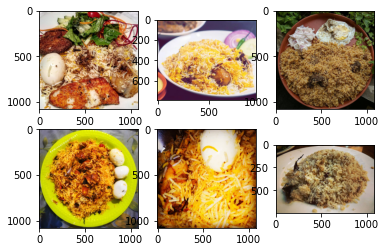

Test image height is: 192
Test image width is: 640


In [6]:
# DISPLAY DATASET IMAGES
import numpy as np # linear algebra
from PIL import Image
import matplotlib.pyplot as plt

#img_array = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (2).jpg'))
#plt.imshow(img_array)

img_array0 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (2).jpg'))
img_array1 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (4).jpg'))
img_array2 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (7).jpg'))
img_array3 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (9).jpg'))
img_array4 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (22).jpg'))
img_array5 = np.array(Image.open('./food20dataset/test_set/biriyani/biriyanitest (24).jpg'))
array_img = [img_array0, img_array1, img_array2, img_array3, img_array4, img_array5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(array_img[i])
plt.show()

# DISPLAY NETWORK INPUT SIZE
img_height = encoder_dict["height"]
img_width = encoder_dict["width"]
print("Test image height is:", img_height)
print("Test image width is:", img_width)

# Applying Transform & Predicting Output

Text(0.5, 1.0, 'Disparity Prediction')

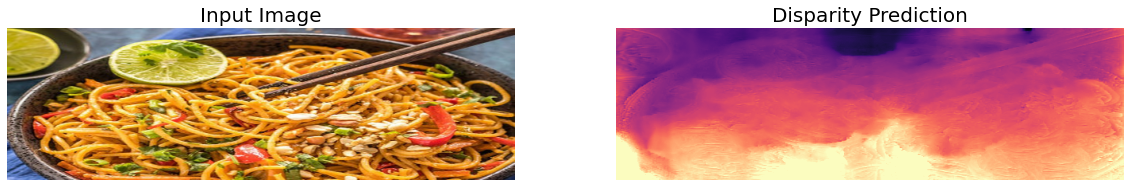

In [21]:
import cv2                                                                          #from torchvision import transforms   #from PIL import Image
img = cv2.imread('./food20dataset/test_set/noodles/noodlestest (30).jpg')           #img = Image.open('./food20dataset/test_set/noodles/noodlestest (30).jpg')
#img = cv2.imread('./food20dataset/test_set/biriyani/biriyanitest (24).jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (img_width, img_height))

# display input image
plt.figure(figsize=(20,5))
plt.subplot(121);plt.imshow(img);plt.axis('off');plt.title("Input Image",fontsize=20)   #plt.imshow(img)

# apply transforms
inp = transforms.ToTensor()(img).unsqueeze(0)   #inp = transform(img).unsqueeze(0)  #transform = transforms.Compose([ transforms.ToTensor() )])

# Predict the output depth of the input image through the net                               
out = depth_decoder(depth_encoder(inp))  

# show prediction result
disparity = out[("disparity", "Scale0")].cpu().detach().squeeze().numpy()
vmax = np.percentile(disparity, 95)
plt.subplot(122);plt.imshow(disparity, vmax=vmax, cmap="magma");plt.axis('off');plt.title("Disparity Prediction", fontsize=20)